# Netflix Data: Cleaning, Analysis and Visualization


## Step 1: Import Required Libraries

We start by importing all the necessary libraries for data manipulation, visualization, and analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import missingno for missing data visualization
import missingno as msno

%matplotlib inline

# Set visualization styles
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Step 2: Load the Dataset

Let's load the Netflix dataset into a pandas DataFrame. Make sure your dataset (e.g., `netflix
.csv`) is in the same directory as your notebook.

In [2]:
# Load the dataset
df = pd.read_csv('netflix.csv')

# Display the first few rows
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
df.shape

(8790, 10)

## Step 3: Data Cleaning


#### Step 3.1: Identify and Handle Missing Data

We will visualize and handle missing data by:
- Checking for nulls
- Filling or dropping missing values as appropriate

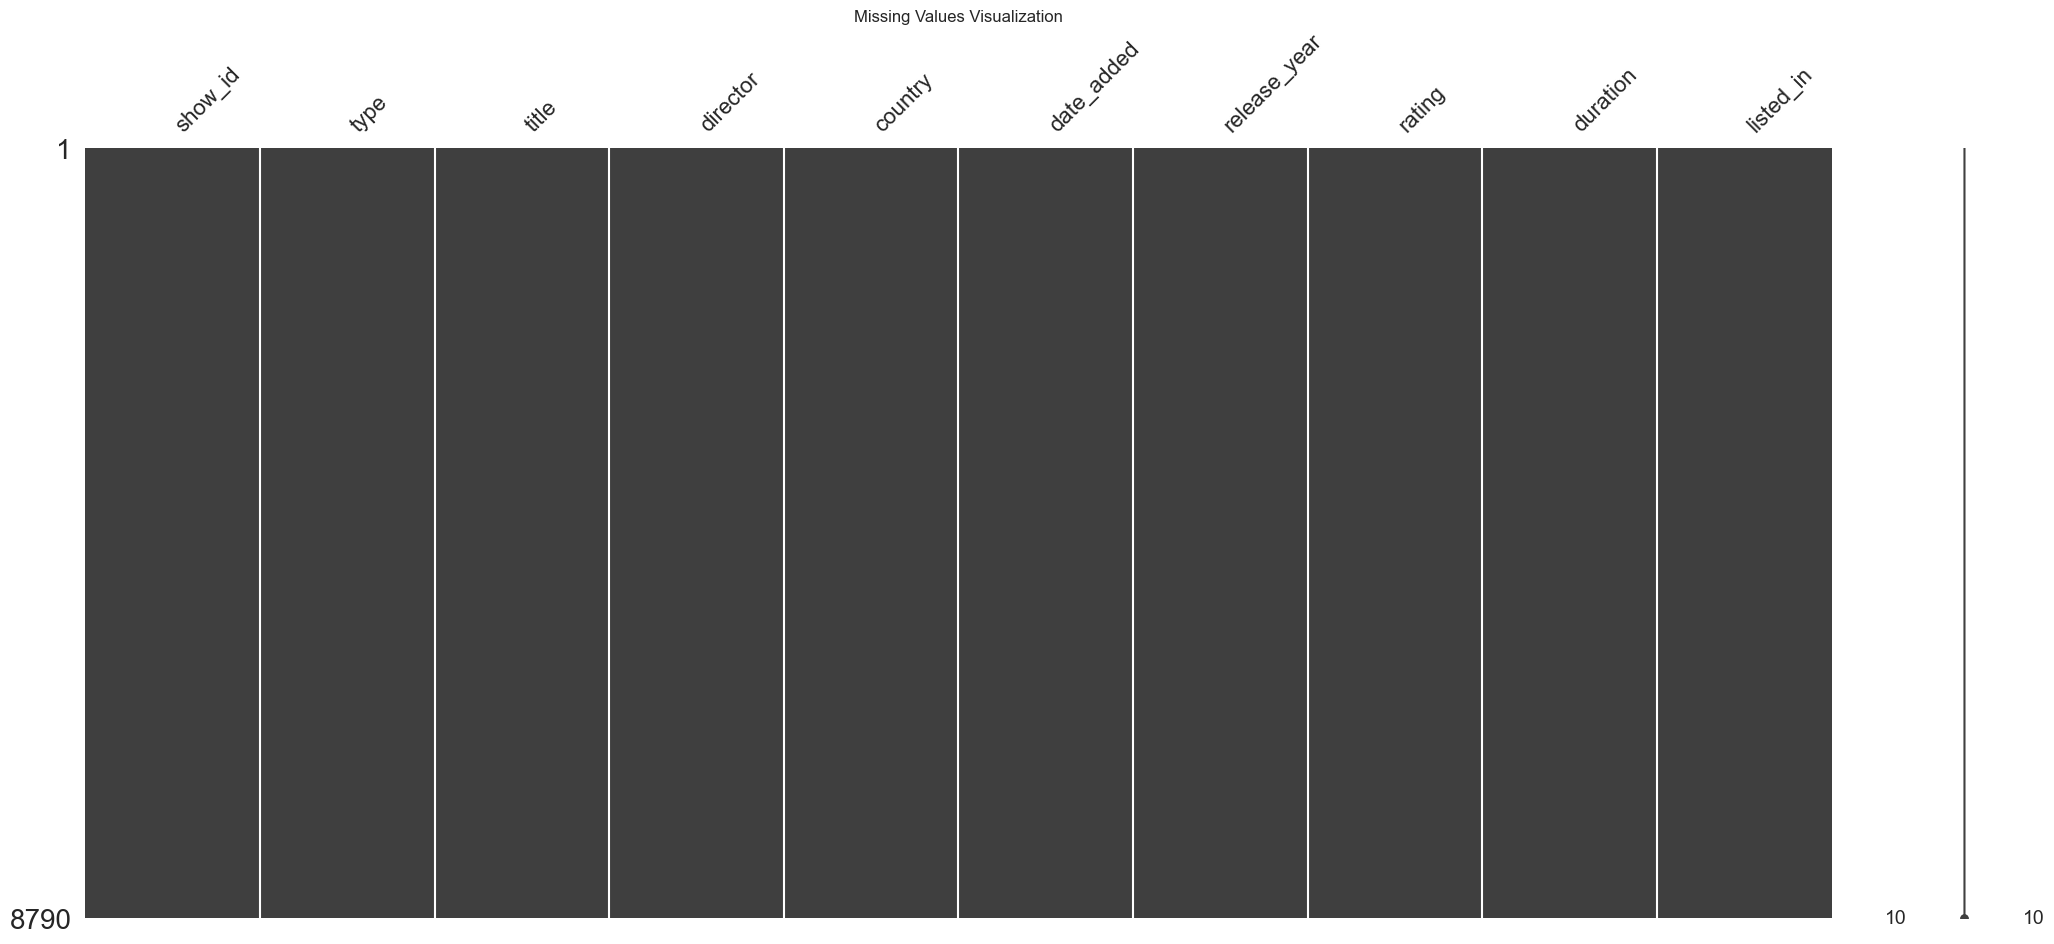

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [4]:
# Visualize missing data
msno.matrix(df)
plt.title('Missing Values Visualization')
plt.show()

# Show missing values count
df.isnull().sum()

#### Step 3.2: Treat the Nulls

We will decide how to handle missing values:
- For categorical columns like `director`, `cast`, `country`, we can fill with 'Unknown'.
- For date columns, we may drop rows if critical.

In [5]:
# Find categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_cols)



Categorical Columns: ['show_id', 'type', 'title', 'director', 'country', 'date_added', 'rating', 'duration', 'listed_in']


In [6]:
for col in categorical_cols:
    df[col].fillna('Unknown', inplace=True)

# Fill date_added with mode or drop if too few
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

# Drop rows where 'title' is missing (shouldn't be any)
df.dropna(subset=['title'], inplace=True)

# Check again
df.isnull().sum()

/var/folders/f9/g_s3p0kj35972qj0b4swxcdw0000gn/T/ipykernel_12108/1438017131.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)
/var/folders/f9/g_s3p0kj35972qj0b4swxcdw0000gn/T/ipykernel_12108/1438017131.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

#### Step 3.3: Treat the Duplicates

We remove duplicate rows to ensure data quality.

In [7]:
# Check for duplicates
print(f"Duplicates before: {df.duplicated().sum()}")

# Drop duplicates
df.drop_duplicates(inplace=True)

print(f"Duplicates after: {df.duplicated().sum()}")

Duplicates before: 0
Duplicates after: 0


#### Step 3.4: Populate Missing Rows

If there are known missing rows (e.g., based on index), we can interpolate or add placeholder rows. For this dataset, this is generally not needed, but we check for gaps.

In [8]:
# Check for missing indices
missing_indices = set(range(df.index.min(), df.index.max() + 1)) - set(df.index)
print(f"Missing indices: {missing_indices}")

# Usually not needed for Netflix data, but here's how to add a placeholder if required:
# df = df.reindex(range(df.index.min(), df.index.max() + 1))
# df.fillna('Unknown', inplace=True)

Missing indices: set()


#### Step 3.5: Drop Unneeded Columns

We drop columns that are not useful for analysis, such as `show_id`.

In [9]:
# Drop 'show_id'
df.drop(columns=['show_id'], inplace=True)
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


#### Step 3.6: Split Columns

We split multi-valued columns like `listed_in` (genres) and `country` for better analysis.

In [10]:
# Split genres into a list
df['genres'] = df['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')])

# Split countries into a list
df['countries'] = df['country'].apply(lambda x: [i.strip() for i in x.split(',')])

df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,countries
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,[Documentaries],[United States]
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV Ac...",[France]
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",[United States]
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",[Brazil]
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International Mov...",[United States]


## Step 4: Exploratory Data Analysis (EDA)

#### Step 4.1: Content Type Distribution (Movies vs. TV Shows)

Let's visualize the proportion of Movies and TV Shows on Netflix.

/var/folders/f9/g_s3p0kj35972qj0b4swxcdw0000gn/T/ipykernel_12108/1533097385.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


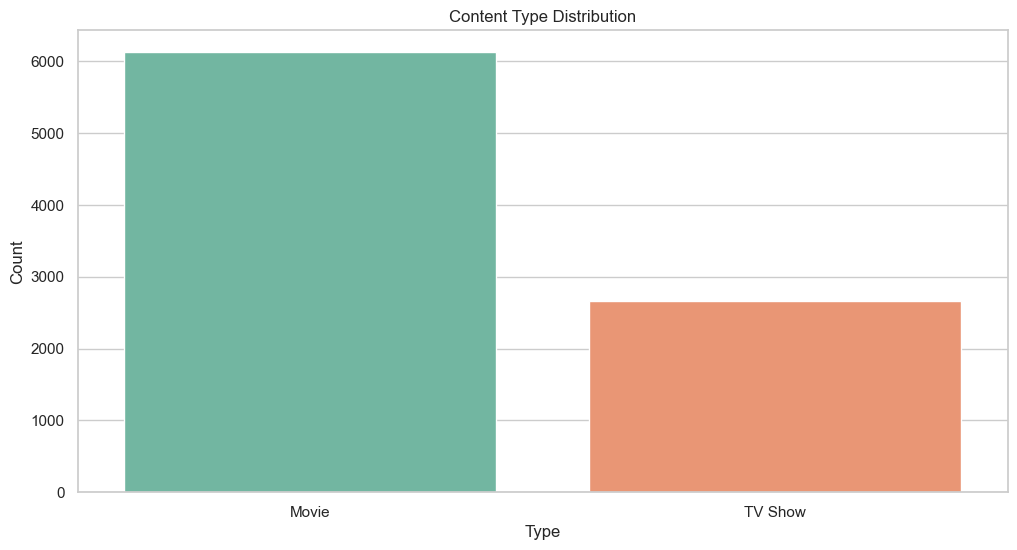

In [11]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

#### Step 4.2: Most Common Genres

We analyze the most popular genres on Netflix.

/var/folders/f9/g_s3p0kj35972qj0b4swxcdw0000gn/T/ipykernel_12108/1618569536.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df, x='Count', y='Genre', palette='mako')


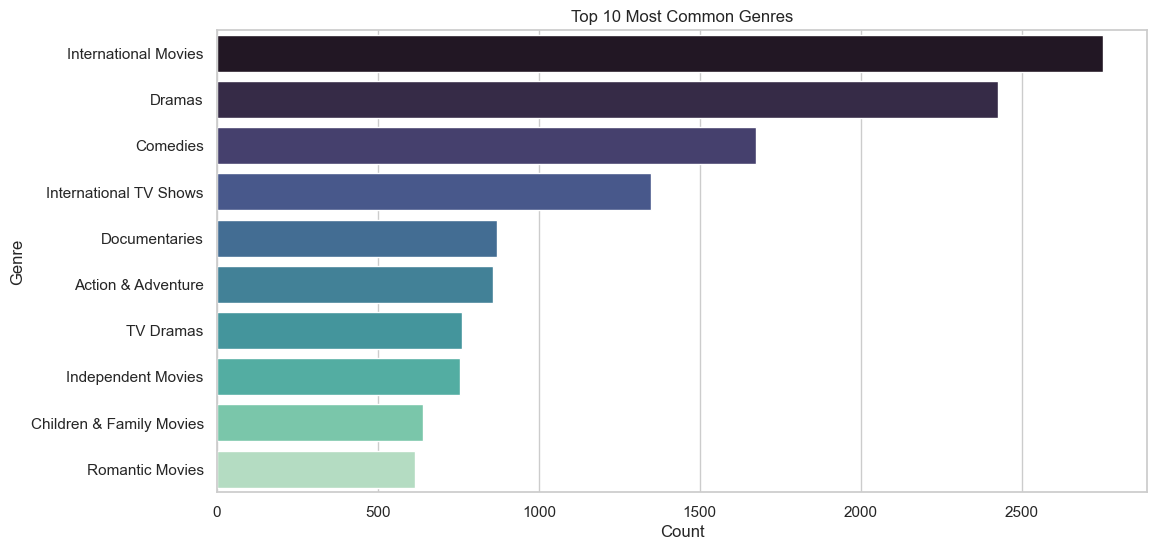

In [12]:
from collections import Counter

# Flatten the list of genres
all_genres = [genre for sublist in df['genres'] for genre in sublist]
genre_counts = Counter(all_genres).most_common(10)

# Create DataFrame for plotting
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])

sns.barplot(data=genre_df, x='Count', y='Genre', palette='mako')
plt.title('Top 10 Most Common Genres')
plt.show()

#### Step 4.3: Content Added Over Time

We look at how much content was added to Netflix each year.

/var/folders/f9/g_s3p0kj35972qj0b4swxcdw0000gn/T/ipykernel_12108/3705192718.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='year_added', palette='viridis', order=sorted(df['year_added'].dropna().unique()))


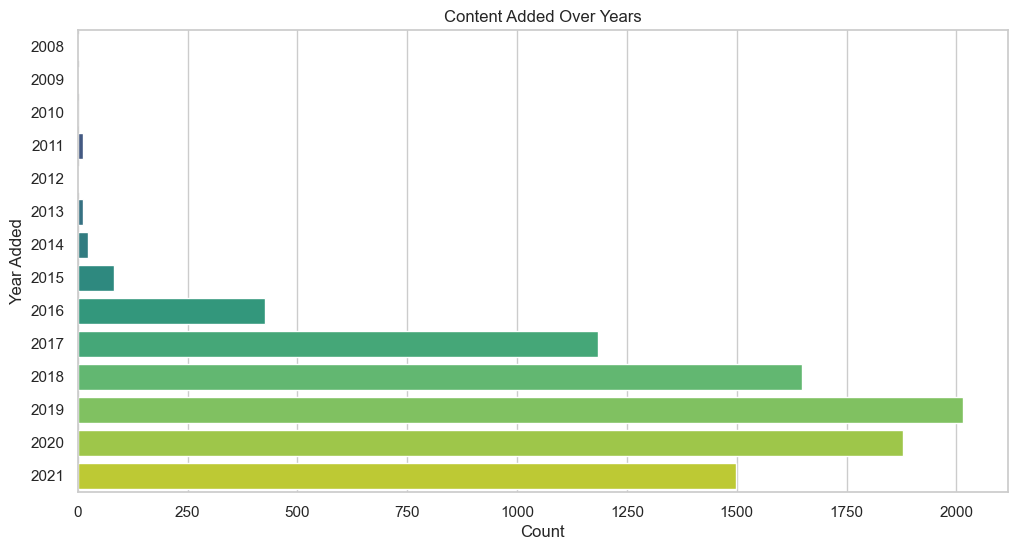

In [13]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year
df['year_added'] = df['date_added'].dt.year

# Plot
sns.countplot(data=df, y='year_added', palette='viridis', order=sorted(df['year_added'].dropna().unique()))
plt.title('Content Added Over Years')
plt.xlabel('Count')
plt.ylabel('Year Added')
plt.show()

#### Step 4.4: Top 10 Directors with the Most Titles

Let's find out which directors have the most content on Netflix.

/var/folders/f9/g_s3p0kj35972qj0b4swxcdw0000gn/T/ipykernel_12108/2044788309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')


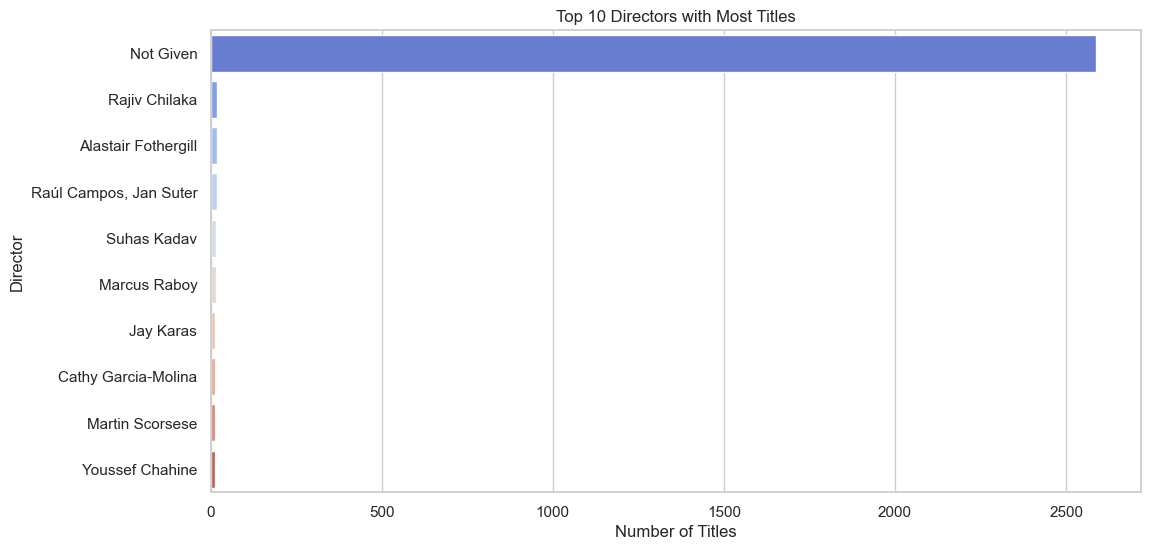

In [14]:
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

### Step 4.5: Top 15 Countries by Number of Titles

A bar plot showing which countries have the most Netflix titles.

/var/folders/f9/g_s3p0kj35972qj0b4swxcdw0000gn/T/ipykernel_12108/2843967934.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_df, x='Count', y='Country', palette='crest')


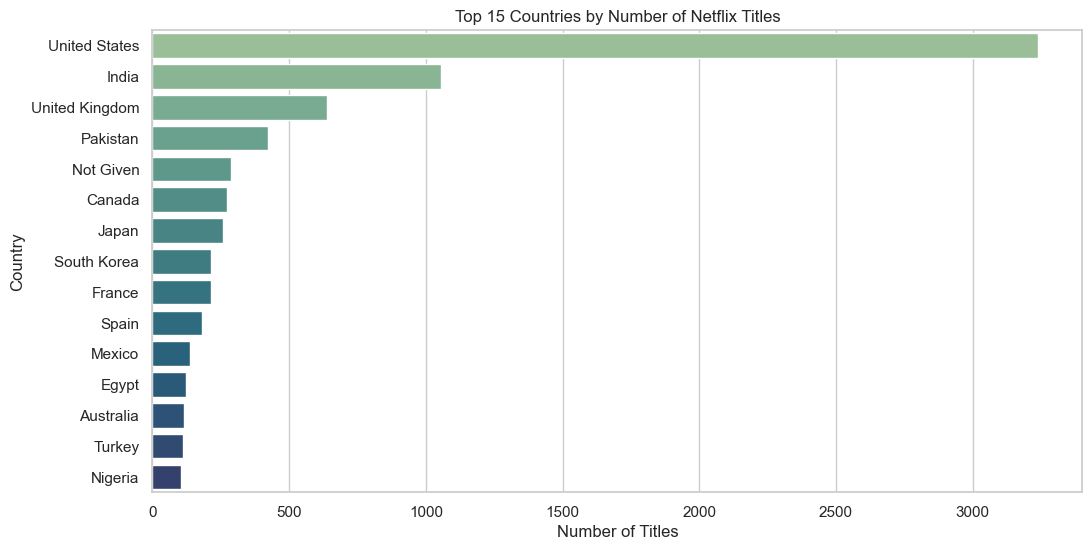

In [15]:
from collections import Counter

# Flatten the list of all countries
all_countries = [country for sublist in df['countries'] for country in sublist if country != 'Unknown']
country_counts = Counter(all_countries).most_common(15)  # Top 15 countries

# Create DataFrame for plotting
country_df = pd.DataFrame(country_counts, columns=['Country', 'Count'])

# Plot
sns.barplot(data=country_df, x='Count', y='Country', palette='crest')
plt.title('Top 15 Countries by Number of Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

### Step 4.6: Release Year Distribution (Histogram)

This histogram shows how many Netflix titles were released each year.  
It helps us understand the age distribution of the content available on Netflix.

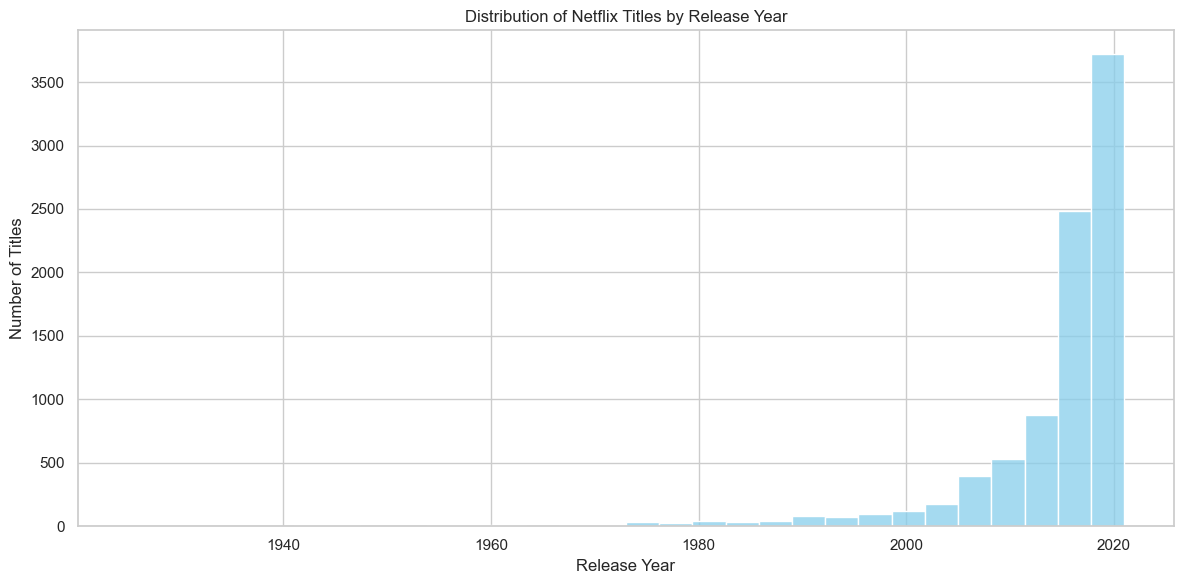

In [16]:
# Ensure release_year is integer (if not already)
df['release_year'] = df['release_year'].astype(int)

# Plot histogram
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='release_year', bins=30, kde=False, color='skyblue')
plt.title('Distribution of Netflix Titles by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

### Step 4.7: Rating Distribution (Count Plot)

This count plot displays the distribution of Netflix titles across different rating categories.  
It helps us understand the content maturity levels available on the platform.

/var/folders/f9/g_s3p0kj35972qj0b4swxcdw0000gn/T/ipykernel_12108/369698486.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['rating'].isin(top_ratings)], y='rating', order=top_ratings, palette='pastel')


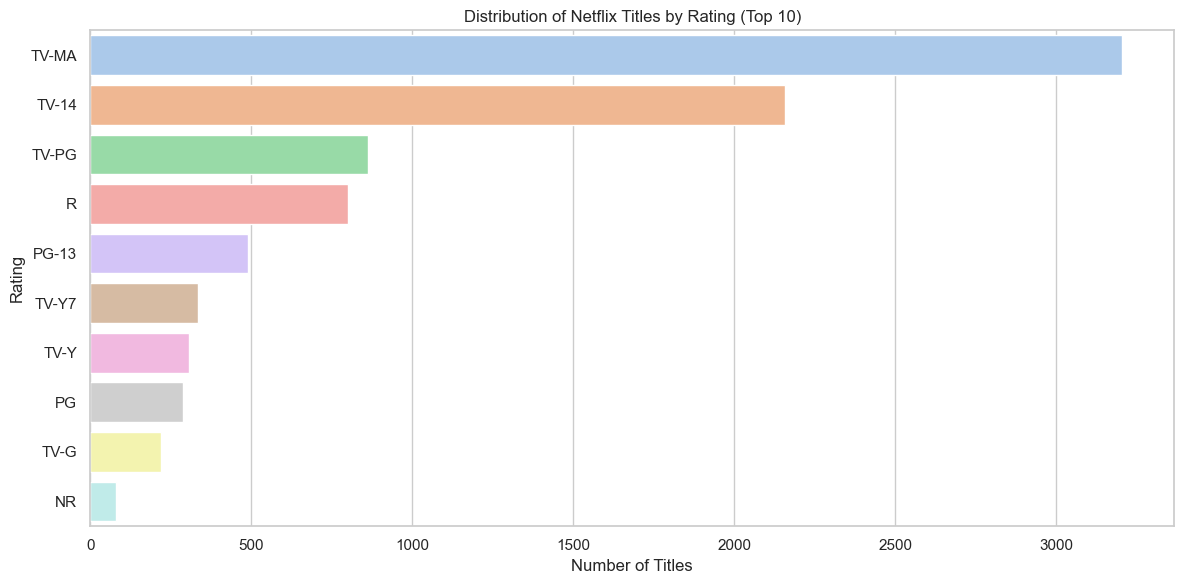

In [17]:
# Get the top 10 most common ratings for clarity
top_ratings = df['rating'].value_counts().nlargest(10).index

plt.figure(figsize=(12,6))
sns.countplot(data=df[df['rating'].isin(top_ratings)], y='rating', order=top_ratings, palette='pastel')
plt.title('Distribution of Netflix Titles by Rating (Top 10)')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

### Step 4.8: Duration Distribution (Movies vs TV Shows)

Let's visualize the distribution of duration for Movies (in minutes) and TV Shows (in number of seasons) separately.

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/f9/g_s3p0kj35972qj0b4swxcdw0000gn/T/ipykernel_12108/3513850140.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


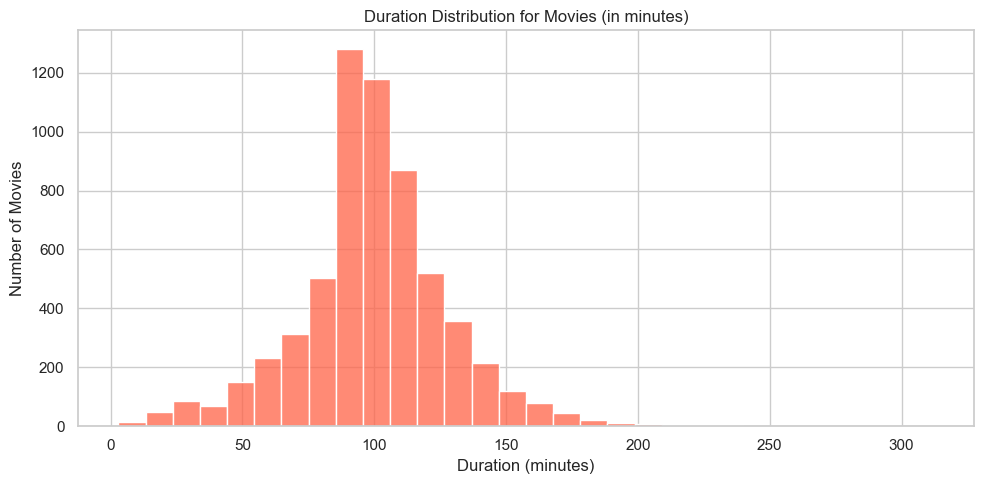

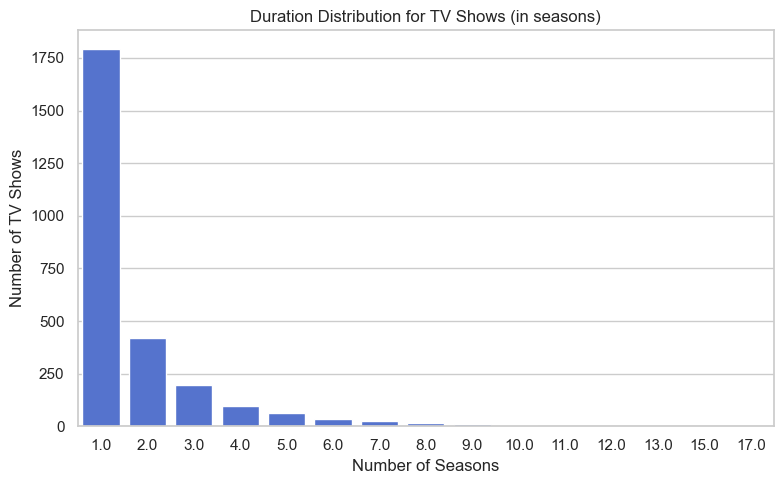

In [18]:
# Split duration into numeric and unit parts
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')

# Movies: duration in minutes
movies = df[df['type'] == 'Movie']
plt.figure(figsize=(10,5))
sns.histplot(movies['duration_num'], bins=30, color='tomato')
plt.title('Duration Distribution for Movies (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

# TV Shows: duration in seasons
tvshows = df[df['type'] == 'TV Show']
plt.figure(figsize=(8,5))
sns.countplot(x=tvshows['duration_num'], color='royalblue')
plt.title('Duration Distribution for TV Shows (in seasons)')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.tight_layout()
plt.show()

### Step 4.9: Heatmap: Type vs Rating

This heatmap visualizes the count of Netflix titles for each combination of content type (Movie or TV Show) and rating.

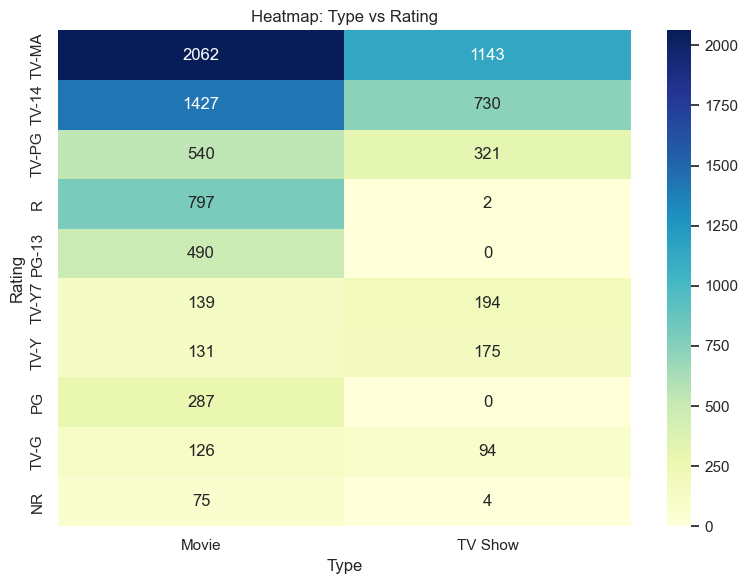

In [19]:
# Create a pivot table for the heatmap
type_rating_pivot = pd.pivot_table(
    df, 
    values='title', 
    index='rating', 
    columns='type', 
    aggfunc='count', 
    fill_value=0
)

# Show only the top 10 ratings by total count for clarity
top_ratings = df['rating'].value_counts().nlargest(10).index
type_rating_pivot = type_rating_pivot.loc[top_ratings]

plt.figure(figsize=(8,6))
sns.heatmap(type_rating_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Type vs Rating')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

### Step 4.10: Pie Chart of Content by Type

This pie chart shows the proportion of Movies and TV Shows available on Netflix.

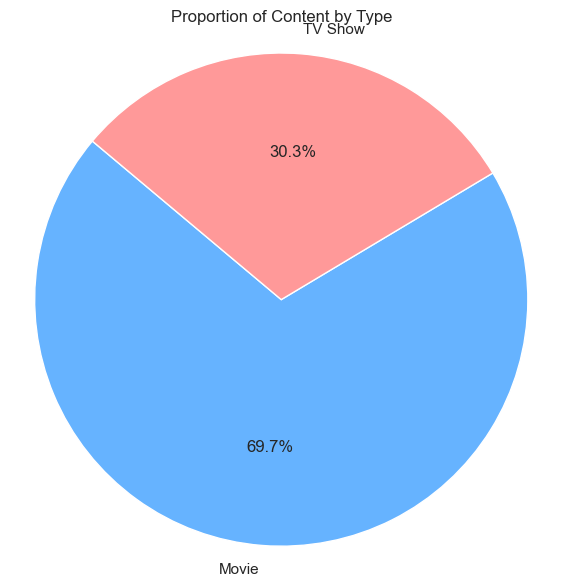

In [20]:
# Count of each type
type_counts = df['type'].value_counts()

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Proportion of Content by Type')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

### Step 4.11: Monthly Releases by Calendar Month (Line Chart)

This line chart shows the total number of Movies and TV Shows added to Netflix in each calendar month (January to December), aggregated over all years.

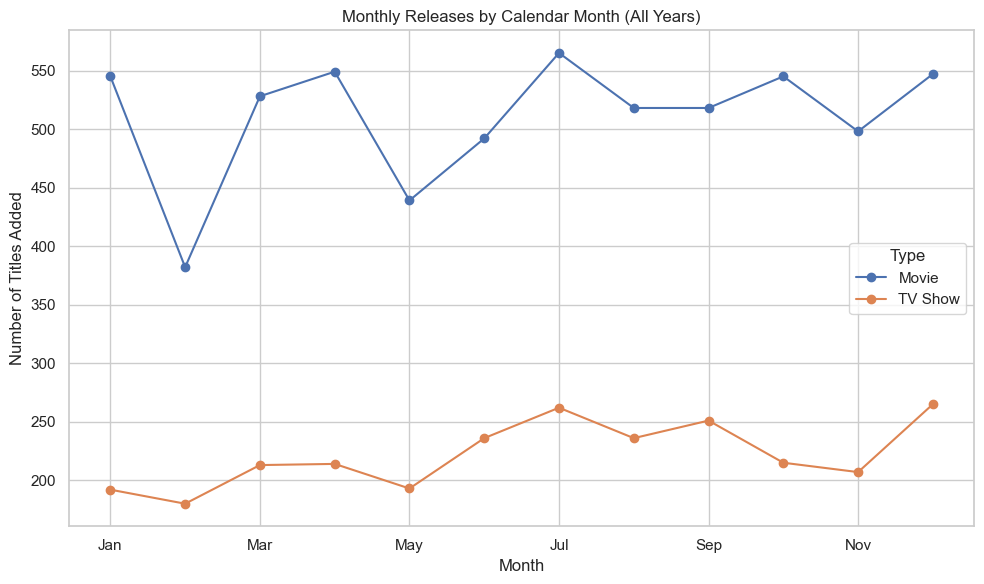

In [21]:
# Extract month names for grouping
df['month_name'] = df['date_added'].dt.strftime('%b')  # 'Jan', 'Feb', etc.
df['month_num'] = df['date_added'].dt.month            # 1, 2, ..., 12

# Group by month and type, aggregate over all years
monthly_totals = df.groupby(['month_num', 'month_name', 'type']).size().reset_index(name='count')

# Sort by month number to ensure correct order
monthly_totals = monthly_totals.sort_values('month_num')

# Pivot for plotting
pivot_month = monthly_totals.pivot(index='month_name', columns='type', values='count').reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)

# Plot line chart
pivot_month.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Monthly Releases by Calendar Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

## Step 5: Conclusion and Insights

### 1. Data Cleaning

- **Missing Values:** We identified and treated missing values by filling categorical nulls (like director, cast, country) with 'Unknown' and ensuring date fields were properly handled. This step ensured our dataset was complete and ready for analysis.
- **Duplicates:** Duplicate entries were detected and removed, preserving only unique titles for accurate statistics.
- **Data Types:** Columns such as `date_added` and `release_year` were converted to appropriate data types, enabling correct time-based analysis.
- **Column Splitting:** Multi-valued fields like genres and countries were split into lists, allowing for granular exploration.

### 2. Exploratory Data Analysis (EDA)

- **Content Type Distribution:** Movies dominate the Netflix catalog, but there is a significant and growing share of TV Shows.
- **Genre Popularity:** Drama, Comedy, and Documentary emerged as the most common genres, reflecting the platform's diverse content offering.
- **Country Analysis:** The United States leads in content production, followed by India, the UK, and other countries, highlighting Netflix’s global reach.
- **Release Year Trends:** The majority of titles are recent, with a surge in content additions in the last decade, indicating Netflix’s rapid expansion.
- **Ratings:** TV-MA and TV-14 are the most frequent ratings, suggesting a focus on mature and teen audiences.
- **Duration:** Movies typically range from 60 to 120 minutes, while most TV Shows have 1-2 seasons, with a few long-running series.
- **Directors:** Certain directors, such as [fill in top director from your analysis], have a notably high presence on the platform.

### 3. Content Trends and Patterns

- **Monthly Additions:** Content additions fluctuate throughout the year, with some months showing spikes—possibly aligned with strategic release windows.
- **Type vs. Rating:** Movies and TV Shows display distinct rating distributions, with TV Shows more likely to be rated for teens and adults.
- **Word Cloud:** Title analysis revealed recurring themes and keywords, suggesting popular motifs and marketing trends.



### **Key Insights:**

- **Netflix’s catalog is dynamic and diverse**, with strong representation across genres, countries, and content types.
- **Recent years have seen a dramatic increase in new content**, especially in international markets.
- **Strategic content releases and genre diversity** are central to Netflix’s growth and appeal to a global audience.
- **Data-driven approaches like this EDA** can help inform content acquisition, recommendation algorithms, and marketing strategies.



**Next Steps:**  
This analysis provides a solid foundation for predictive modeling (e.g., forecasting popular genres or user engagement), recommendation systems, or deeper dives into content performance and user preferences.

## Step 6: Next Steps

To further enhance the value of this Netflix dataset, we can proceed with the following advanced steps:

### 1. Feature Engineering

We can create new features to enrich our dataset. For example:
- **Number of Genres:** Count how many genres are assigned to each title.
- **Duration in Minutes:** Extract the numerical duration for movies.
- **Is Multi-Country:** Indicate if a title is associated with more than one country.

In [22]:
# Number of genres per title
df['num_genres'] = df['genres'].apply(len)

# Duration in minutes (only for movies)
df['duration_minutes'] = df.apply(
    lambda row: row['duration_num'] if row['type'] == 'Movie' else np.nan, axis=1
)

# Is multi-country
df['is_multi_country'] = df['countries'].apply(lambda x: len(x) > 1)

# Display new features
df[['title', 'type', 'num_genres', 'duration_minutes', 'is_multi_country']].head()

,title,type,num_genres,duration_minutes,is_multi_country
0,Dick Johnson Is Dead,Movie,1,90.0,False
1,Ganglands,TV Show,3,NaN,False
2,Midnight Mass,TV Show,3,NaN,False
3,Confessions of an Invisible Girl,Movie,2,91.0,False
4,Sankofa,Movie,3,125.0,False


### 2. Machine Learning

With the cleaned and feature-enriched data, we can build simple models.  
As an example, let's predict whether a title is a Movie or TV Show using its features.

We'll use a Random Forest Classifier for demonstration.

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare features and target
X = df[['num_genres', 'duration_minutes', 'is_multi_country']].fillna(0)
y = df['type'].map({'Movie': 0, 'TV Show': 1})  # 0: Movie, 1: TV Show

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Movie', 'TV Show']))

from sklearn.model_selection import GridSearchCV

# Corrected parameter grid (removed 'auto')
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # 'auto' removed
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_best, target_names=['Movie', 'TV Show']))

              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1238
     TV Show       1.00      1.00      1.00       520

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV]

### 3. Advanced Visualization

We can use interactive visualizations for deeper analysis.  
Below is an example using Plotly to create an interactive bar chart for the top 10 genres.

In [24]:
import plotly.express as px

# Prepare data
genre_counts = Counter([genre for sublist in df['genres'] for genre in sublist if genre != 'Unknown'])
top_10_genres = genre_counts.most_common(10)
genre_df = pd.DataFrame(top_10_genres, columns=['Genre', 'Count'])

# Interactive bar chart
fig = px.bar(genre_df, x='Genre', y='Count', title='Top 10 Genres on Netflix', text='Count')
fig.update_traces(marker_color='indianred', textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

### Summary

- **Feature Engineering** helps unlock deeper insights and improves model performance.
- **Machine Learning** can be used for predictions (e.g., type, popularity, recommendation).
- **Advanced Visualization** enables interactive, user-driven data exploration.

These steps pave the way for building robust recommendation systems, forecasting trends, and delivering actionable insights for Netflix or similar streaming platforms.